In [1]:
#data analysis and data viz
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#hypothesis testing
from scipy import stats
#ML Pre-processing 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle
#ML Models
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head(3)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000


In [4]:
df.shape

(986, 11)

In [5]:
df['BMI']=df['Weight']/((df['Height']*0.01)**2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int64  
 2   BloodPressureProblems    986 non-null    int64  
 3   AnyTransplants           986 non-null    int64  
 4   AnyChronicDiseases       986 non-null    int64  
 5   Height                   986 non-null    int64  
 6   Weight                   986 non-null    int64  
 7   KnownAllergies           986 non-null    int64  
 8   HistoryOfCancerInFamily  986 non-null    int64  
 9   NumberOfMajorSurgeries   986 non-null    int64  
 10  PremiumPrice             986 non-null    int64  
 11  BMI                      986 non-null    float64
dtypes: float64(1), int64(11)
memory usage: 92.6 KB


In [7]:
num_var=['Age','Weight','Height','PremiumPrice','BMI']
cat_var=[col for col in df.columns if col not in ['Age','Weight','Height','PremiumPrice','BMI']]

In [8]:
df[num_var].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.000000,30.000000,42.000000,53.00000,66.0
Weight,986.0,76.950304,14.265096,51.000000,67.000000,75.000000,87.00000,132.0
Height,986.0,168.182556,10.098155,145.000000,161.000000,168.000000,176.00000,188.0
PremiumPrice,986.0,24336.713996,6248.184382,15000.000000,21000.000000,23000.000000,28000.00000,40000.0
BMI,986.0,27.460709,5.878671,15.156281,23.393392,27.156602,30.75987,50.0


Distribution Analysis

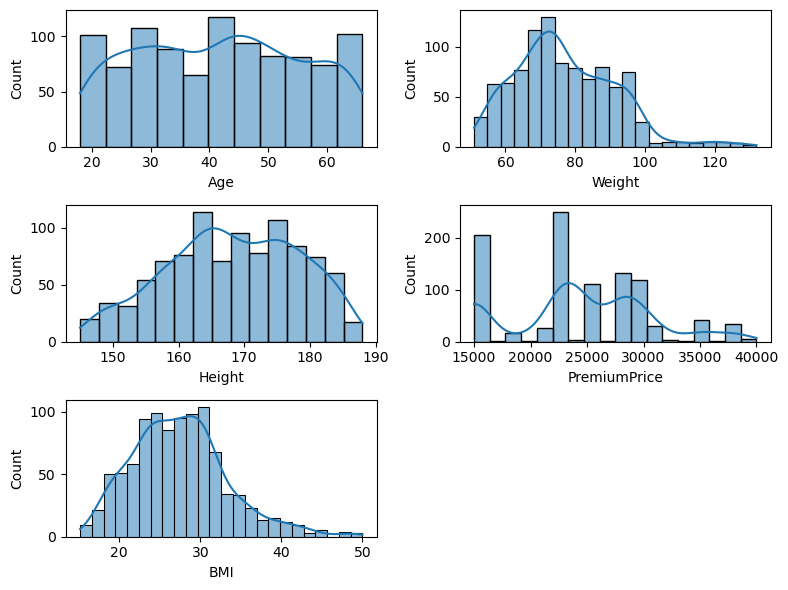

In [9]:
plt.figure(figsize=(8, 6))

for i in range(0,len(num_var)):
    plt.subplot(3, 2, i+1)
    sns.histplot(df, x=num_var[i],kde=True)

plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()

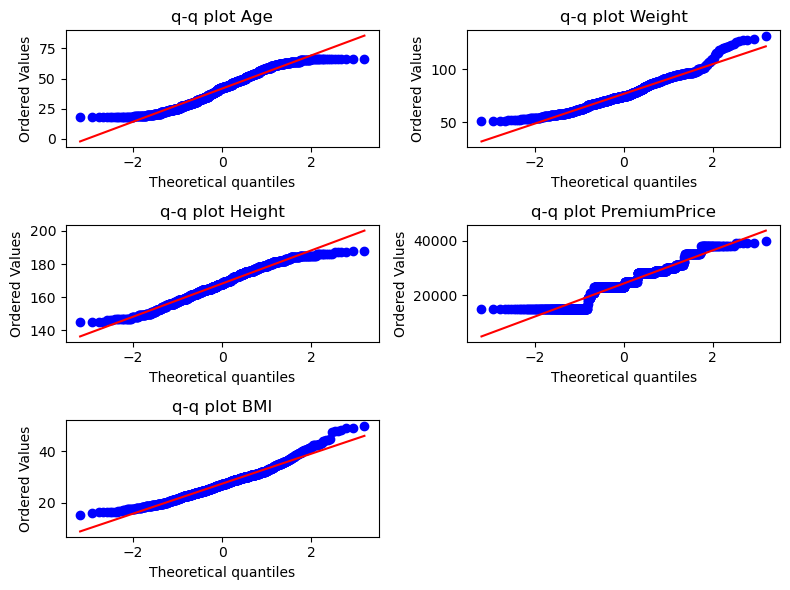

In [10]:
plt.figure(figsize=(8, 6))

for i in range(0,len(num_var)):
    plt.subplot(3, 2, i+1)
    stats.probplot(df[num_var[i]], dist="norm", plot=plt)
    plt.title(f'q-q plot {num_var[i]}')
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()

- None of the discrete variables seem to be normally distributed graphically

In [11]:
for var in num_var:
    _, p_value1 = stats.shapiro(df[var])
    if p_value1<=0.05:
        print(f'{var} does not have normal distribution according to shapiro-wilk test')
    else:
        print(f'{var} has normal distribution according to shapiro-wilf test')
    _, p_value2 = stats.kstest(df[var], 'norm')
    if p_value2<=0.05:
        print(f'{var} does not have normal distribution according to Kolmogorov-Smirnov test')
    else:
        print(f'{var} has normal distribution according to Kolmogorov-Smirnov test')
    print('*'*50)

Age does not have normal distribution according to shapiro-wilk test
Age does not have normal distribution according to Kolmogorov-Smirnov test
**************************************************
Weight does not have normal distribution according to shapiro-wilk test
Weight does not have normal distribution according to Kolmogorov-Smirnov test
**************************************************
Height does not have normal distribution according to shapiro-wilk test
Height does not have normal distribution according to Kolmogorov-Smirnov test
**************************************************
PremiumPrice does not have normal distribution according to shapiro-wilk test
PremiumPrice does not have normal distribution according to Kolmogorov-Smirnov test
**************************************************
BMI does not have normal distribution according to shapiro-wilk test
BMI does not have normal distribution according to Kolmogorov-Smirnov test
**********************************************

- Statistical tests do no suggest normal distribution 

In [12]:
vals=[]
for vars in num_var:
    """Calculate deciles for a given dataset."""
    vals.append(np.percentile(df[vars], np.arange(0, 101, 10)))

vals=np.array(vals)
pd.DataFrame(vals.T,columns=num_var,index=pd.Index(np.arange(0,11,1),name='deciles'))

,Age,Weight,Height,PremiumPrice,BMI
deciles,,,,,
0,18.0,51.0,145.0,15000.0,15.156281
1,22.0,59.0,154.0,15000.0,20.031471
2,27.0,65.0,159.0,15000.0,22.582709
3,32.0,69.0,163.0,23000.0,24.092971
4,37.0,72.0,165.0,23000.0,25.559329
5,42.0,75.0,168.0,23000.0,27.156602
6,46.0,79.0,172.0,25000.0,28.692653
7,50.5,84.0,175.0,28000.0,30.059456
8,56.0,89.0,178.0,29000.0,31.553659


- Deciles do not suggest any really big outliers

In [13]:
# Method 1: Z-Score Method
def print_z_score_outliers(df, vars, threshold=3):
    for var in vars:
        if var in df.columns:
            mean = df[var].mean()
            std_dev = df[var].std()
            z_scores = np.abs(stats.zscore(df[var]))
            outliers = len(df[z_scores > threshold])
            value_at_z_plus = mean + threshold* std_dev
            value_at_z_minus = mean - threshold * std_dev
            print(f'threshold data for {var} points using  Z-Score method are {value_at_z_minus} and {value_at_z_plus}')
            print(f'Total Outliers for {var} using Z-Score method:{outliers}')
            print('*'*50)

# Method 2: IQR Method
def print_iqr_outliers(df, vars):
    for var in vars:
        if var in df.columns:
            Q1 = df[var].quantile(0.25)
            Q3 = df[var].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = len(df[(df[var] < lower_bound) | (df[var] > upper_bound)])
            print(f'threshold data points for {var} using IQR method are {lower_bound} and {upper_bound}')
            print(f'Outliers for {var} using IQR method:{outliers}')
            print('*'*50)

# Print outliers using both methods
print_z_score_outliers(df, num_var)
print_iqr_outliers(df, num_var)

threshold data for Age points using  Z-Score method are -0.1446780640903853 and 83.63555027504373
Total Outliers for Age using Z-Score method:0
**************************************************
threshold data for Weight points using  Z-Score method are 34.15501674238882 and 119.74559177688096
Total Outliers for Weight using Z-Score method:13
**************************************************
threshold data for Height points using  Z-Score method are 137.88809129796965 and 198.47702026389646
Total Outliers for Height using Z-Score method:0
**************************************************
threshold data for PremiumPrice points using  Z-Score method are 5592.160849224139 and 43081.26714266227
Total Outliers for PremiumPrice using Z-Score method:0
**************************************************
threshold data for BMI points using  Z-Score method are 9.82469412668151 and 45.09672289659291
Total Outliers for BMI using Z-Score method:7
**************************************************


- in both ways (IQR and Z score) of calculating outliers there seem to be not many outliers present in the data

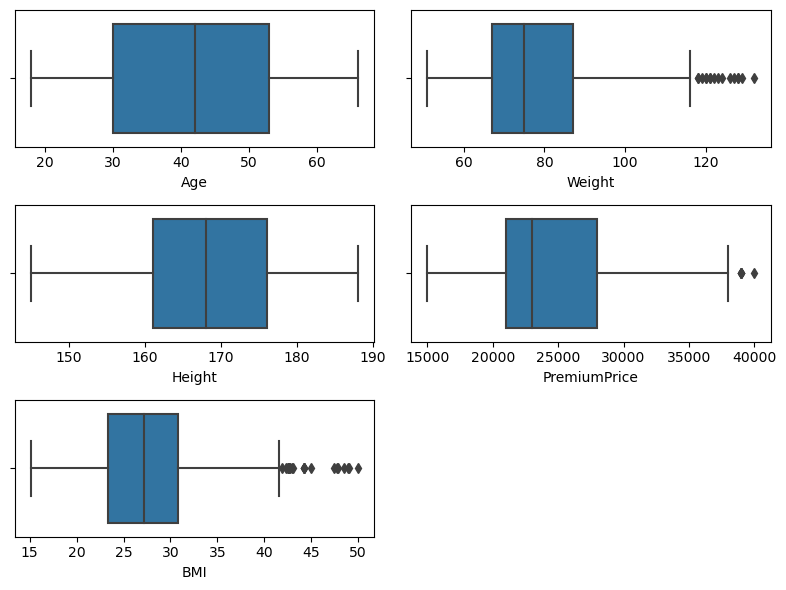

In [14]:
plt.figure(figsize=(8, 6))

for i in range(0,len(num_var)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[num_var[i]])
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()

- Graphically we see outliers in Weight and Premium price around >119kg and >38000 currency and BMI around>41
- We may or may not have to do something to treat outliers by considering the nature and occurence of these outliers

In [15]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[(df['Weight'] < lower_bound) | (df['Weight'] > upper_bound)]

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
154,21,0,0,0,0,157,118,1,0,1,15000,47.872125
158,43,0,0,0,0,158,121,0,0,0,23000,48.469797
183,36,0,0,0,0,156,119,0,0,0,23000,48.898751
186,19,0,0,0,0,173,129,1,0,0,15000,43.102008
192,50,1,0,0,0,163,127,0,0,2,28000,47.800068
195,19,0,0,0,0,164,132,0,0,0,15000,49.077930
196,39,0,1,0,0,174,120,0,0,0,23000,39.635355
203,24,0,1,0,0,173,128,0,0,1,26000,42.767884
204,27,0,1,0,0,159,120,1,1,1,39000,47.466477
207,18,0,0,0,0,172,123,0,1,1,15000,41.576528


In [16]:
Q1 = df['PremiumPrice'].quantile(0.25)
Q3 = df['PremiumPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[(df['PremiumPrice'] < lower_bound) | (df['PremiumPrice'] > upper_bound)]

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
204,27,0,1,0,0,159,120,1,1,1,39000,47.466477
295,64,1,1,0,1,163,91,0,0,2,40000,34.250442
926,24,0,1,0,0,159,67,0,0,0,39000,26.502116
928,19,0,0,0,0,171,67,0,0,1,39000,22.913033
976,21,0,1,0,0,155,74,0,0,0,39000,30.801249
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


In [17]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)].head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
24,53,0,1,0,0,151,97,0,1,1,35000,42.541994
26,22,0,0,1,0,151,97,0,0,0,15000,42.541994
99,42,0,0,0,0,148,97,0,0,0,23000,44.284149
133,23,1,0,0,0,150,96,0,0,0,15000,42.666667
154,21,0,0,0,0,157,118,1,0,1,15000,47.872125


- Underweight customers are charged high premiums because of the associated risks

In [18]:
dfcopy=df.copy()

In [19]:
# Define the BMI categories and their corresponding labels
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']

# Use pd.cut to categorize the BMI values
dfcopy['BMI_Category'] = pd.cut(dfcopy['BMI'], bins=bins, labels=labels, right=False)

In [20]:
# Define the age categories and their corresponding labels
bins = [18, 26, 36, 46, 56, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-55', '56 and above']

# Use pd.cut to categorize the age values
dfcopy['Age_Bucket'] = pd.cut(dfcopy['Age'], bins=bins, labels=labels, right=False)

In [21]:
cat_var.append('Age_Bucket')
cat_var.append('BMI_Category')

In [74]:
dfcopy.groupby(['Age_Bucket'])['PremiumPrice'].mean()

Age_Bucket
18-25           16212.500000
26-35           21390.476190
36-45           25485.576923
46-55           28121.951220
56 and above    28788.177340
Name: PremiumPrice, dtype: float64

In [22]:
dfcopy.groupby(['Age_Bucket','BMI_Category']).agg(mean_premium=pd.NamedAgg(column='PremiumPrice',aggfunc='mean'))

mean_premium
Age_Bucket   BMI_Category               
18-25        Underweight    15000.000000
             Normal weight  16625.000000
             Overweight     16178.571429
             Obesity        16105.263158
26-35        Underweight    20777.777778
             Normal weight  19705.882353
             Overweight     22166.666667
             Obesity        22417.910448
36-45        Underweight    24666.666667
             Normal weight  24822.580645
             Overweight     25355.263158
             Obesity        26534.482759
46-55        Underweight    26250.000000
             Normal weight  26700.000000
             Overweight     27937.500000
             Obesity        29895.522388
56 and above Underweight    27285.714286
             Normal weight  27600.000000
             Overweight     28745.762712
             Obesity        30435.483871

In [23]:
pd.crosstab(dfcopy['Age_Bucket'],dfcopy['BMI_Category'])

BMI_Category,Underweight,Normal weight,Overweight,Obesity
Age_Bucket,,,,
18-25,7,40,56,57
26-35,9,68,66,67
36-45,12,62,76,58
46-55,4,70,64,67
56 and above,7,75,59,62


In [24]:
for var in cat_var:
    print(np.round(dfcopy.groupby(var).agg(
        total_count=pd.NamedAgg(column=var, aggfunc="count"),
        mean_premium=pd.NamedAgg(column='PremiumPrice',aggfunc='mean')
        ),2))
    print('*'*50)

          total_count  mean_premium
Diabetes                           
0                 572      23931.82
1                 414      24896.14
**************************************************
                       total_count  mean_premium
BloodPressureProblems                           
0                              524      23356.87
1                              462      25448.05
**************************************************
                total_count  mean_premium
AnyTransplants                           
0                       931      23897.96
1                        55      31763.64
**************************************************
                    total_count  mean_premium
AnyChronicDiseases                           
0                           808      23725.25
1                           178      27112.36
**************************************************
                total_count  mean_premium
KnownAllergies                           
0                   

- Variables exhibit the expected average premium, that is people with some problem get charged more premium
- Very little customers distribution among sub-categories for variables of Transplants,chronicdiseases,cancer in family,high number of surgeries (2-3) ,explaining high risk cases are nor preferred and whoever have been accepted get charged more premium
- Highest Premium is observed for customers with transplants
- No special cases to be seen

*******

Correlation Analysis

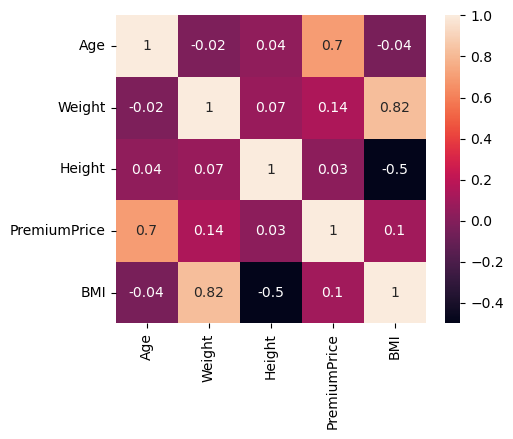

In [25]:
plt.figure(figsize=(5,4))
sns.heatmap(round(dfcopy[num_var].corr(),2),annot=True)
plt.show()

- Premium Price is highly correlated with age, which makes sense that risk increases with age, followed by BMI(kg/m**2)

<Figure size 400x400 with 0 Axes>

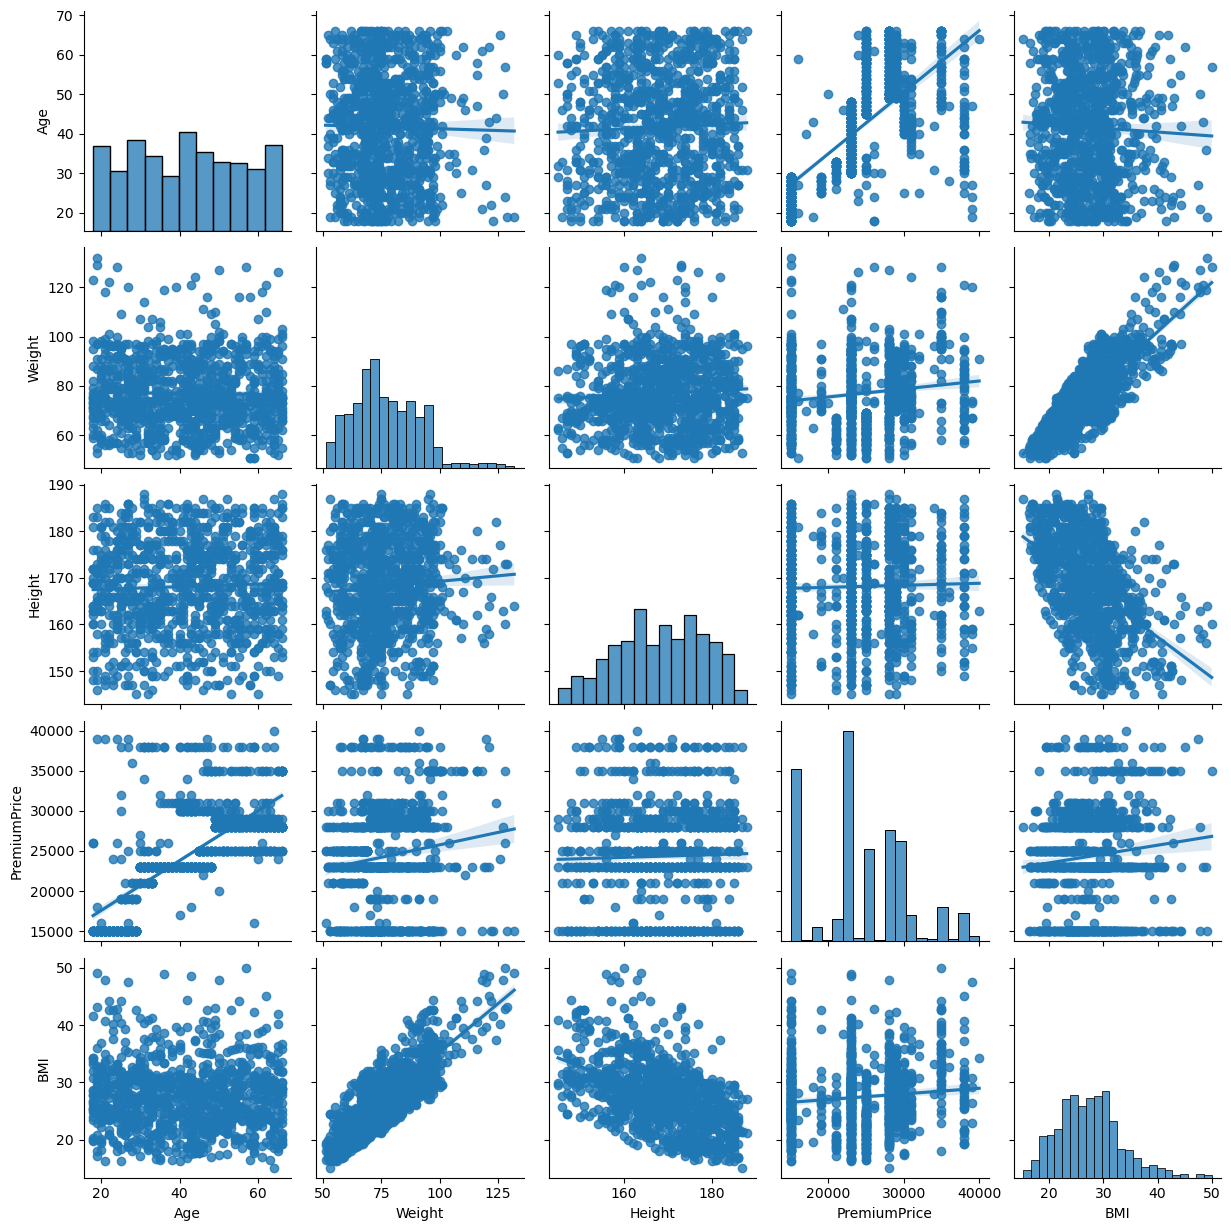

In [26]:
plt.figure(figsize=(4,4))
sns.pairplot(dfcopy[num_var],kind='reg')
plt.show()

- hard to see any linear relationship of premium price with anything

In [27]:
#Spearman rank correlation is used because of the non-normal distribution of numeric variables
spearmanr_array=[]
spearmanhyptest_array=[]
for i in num_var:
    for j in num_var:        
        _,p=stats.spearmanr(dfcopy[i],dfcopy[j])
        spearmanr_array.append(round(p,3))
        if p<=0.05:
            spearmanhyptest_array.append(f'Dependent')
        else:
            spearmanhyptest_array.append(f'Independent')

In [28]:
pd.DataFrame(np.array(spearmanr_array).reshape(5,5),columns=num_var
             ,index=pd.Index(num_var))

,Age,Weight,Height,PremiumPrice,BMI
Age,0.000,0.585,0.284,0.000,0.235
Weight,0.585,0.000,0.020,0.000,0.000
Height,0.284,0.020,0.000,0.468,0.000
PremiumPrice,0.000,0.000,0.468,0.000,0.002
BMI,0.235,0.000,0.000,0.002,0.000


In [29]:
pd.DataFrame(np.array(spearmanhyptest_array).reshape(5,5),columns=num_var
             ,index=pd.Index(num_var))

,Age,Weight,Height,PremiumPrice,BMI
Age,Dependent,Independent,Independent,Dependent,Independent
Weight,Independent,Dependent,Dependent,Dependent,Dependent
Height,Independent,Dependent,Dependent,Independent,Dependent
PremiumPrice,Dependent,Dependent,Independent,Dependent,Dependent
BMI,Independent,Dependent,Dependent,Dependent,Dependent


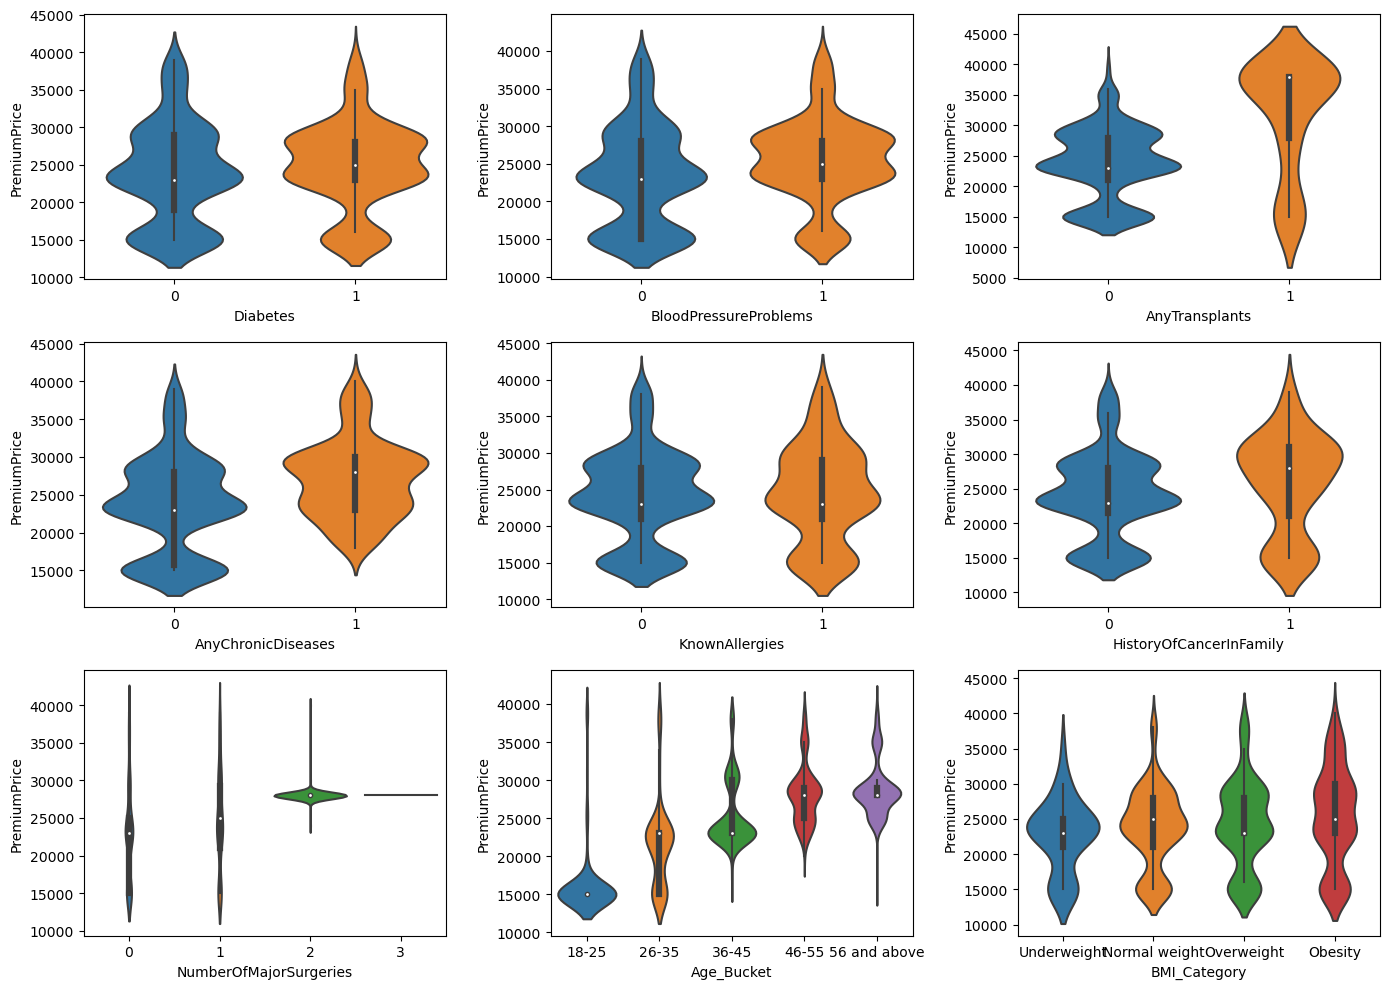

In [30]:
plt.figure(figsize=(14, 10))
for i in range(len(cat_var)):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=dfcopy, x=cat_var[i], y="PremiumPrice")
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()


- Visually confirming our previous observations, median premium higher for all risky cases, allergy seem to have less influence

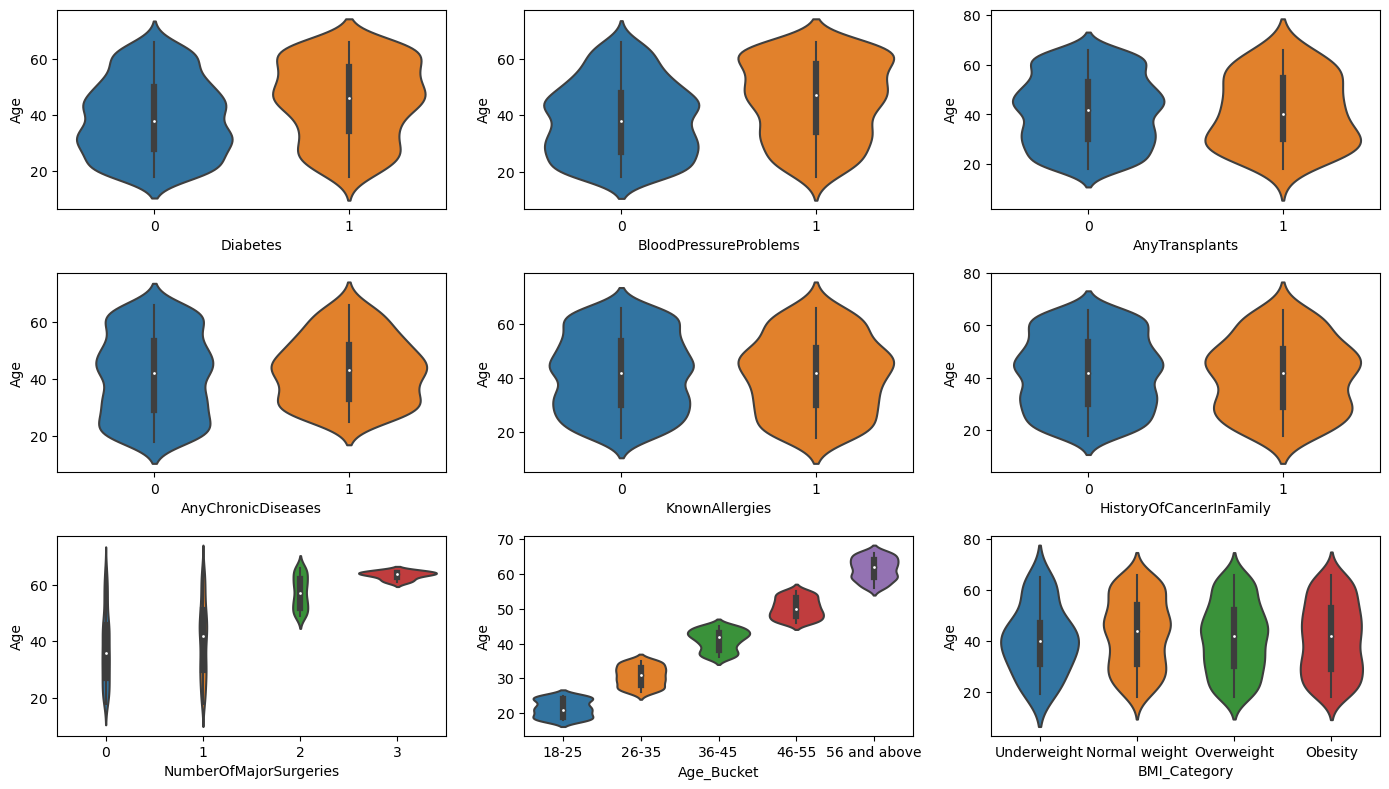

In [31]:
plt.figure(figsize=(14,8))
for i in range(len(cat_var)):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=dfcopy, x=cat_var[i], y="Age")
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()

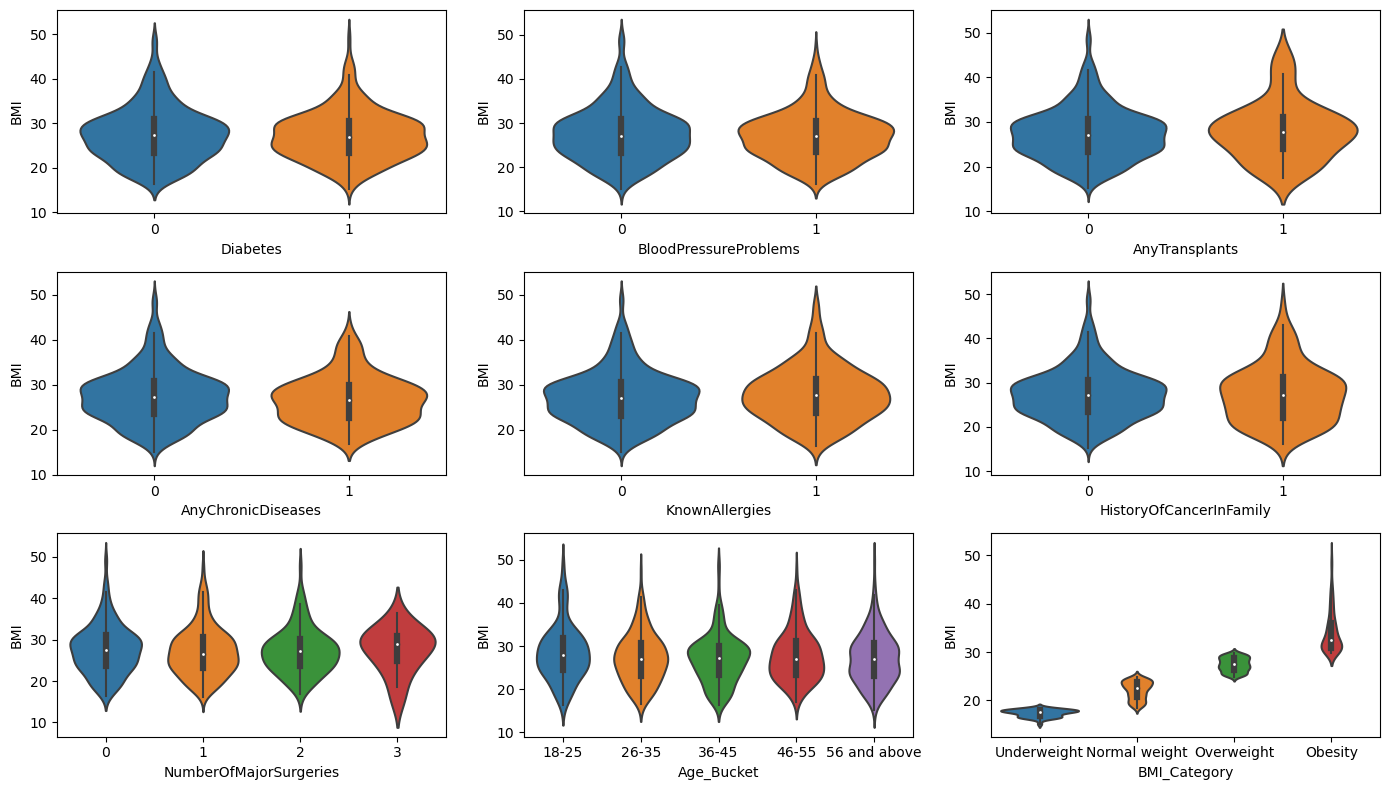

In [32]:
plt.figure(figsize=(14, 8))
for i in range(len(cat_var)):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=dfcopy, x=cat_var[i], y="BMI")
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()

In [33]:
for var in cat_var:
    print(np.round(dfcopy.groupby(var).agg(
        total_count=pd.NamedAgg(column=var, aggfunc="count"),
        mean_bmi=pd.NamedAgg(column='BMI',aggfunc='mean')
        ),2))
    print('*'*50)

          total_count  mean_bmi
Diabetes                       
0                 572     27.58
1                 414     27.30
**************************************************
                       total_count  mean_bmi
BloodPressureProblems                       
0                              524     27.67
1                              462     27.22
**************************************************
                total_count  mean_bmi
AnyTransplants                       
0                       931     27.43
1                        55     28.03
**************************************************
                    total_count  mean_bmi
AnyChronicDiseases                       
0                           808     27.62
1                           178     26.75
**************************************************
                total_count  mean_bmi
KnownAllergies                       
0                       774     27.34
1                       212     27.91
****************

In [34]:
def prob_catvar(var,dependent_cat):
    print(var)
    df1 = pd.crosstab(index=dfcopy[str(var)], columns=[dfcopy[dependent_cat]])
    for i in df1.index:
        print(f"P({i}):{round(df1.loc[i].sum()/len(df),2)}")
    print(f"P({dependent_cat}/{var}):")
    for i in df1.columns:
        for j in df1.index:
            print(f"P({i}/{j}):{round(df1[i][j]/df1.loc[j].sum(),2)}")
    

In [35]:
for i in ['Diabetes','BloodPressureProblems',
  'AnyChronicDiseases',
 'KnownAllergies',
 'HistoryOfCancerInFamily','Age_Bucket','BMI_Category'
 ]:
    prob_catvar(i,'NumberOfMajorSurgeries')
    print('*'*50)

Diabetes
P(0):0.58
P(1):0.42
P(NumberOfMajorSurgeries/Diabetes):
P(0/0):0.49
P(0/1):0.48
P(1/0):0.43
P(1/1):0.31
P(2/0):0.08
P(2/1):0.18
P(3/0):0.0
P(3/1):0.04
**************************************************
BloodPressureProblems
P(0):0.53
P(1):0.47
P(NumberOfMajorSurgeries/BloodPressureProblems):
P(0/0):0.6
P(0/1):0.35
P(1/0):0.33
P(1/1):0.43
P(2/0):0.05
P(2/1):0.2
P(3/0):0.02
P(3/1):0.01
**************************************************
AnyChronicDiseases
P(0):0.82
P(1):0.18
P(NumberOfMajorSurgeries/AnyChronicDiseases):
P(0/0):0.49
P(0/1):0.47
P(1/0):0.38
P(1/1):0.38
P(2/0):0.11
P(2/1):0.16
P(3/0):0.02
P(3/1):0.0
**************************************************
KnownAllergies
P(0):0.78
P(1):0.22
P(NumberOfMajorSurgeries/KnownAllergies):
P(0/0):0.55
P(0/1):0.25
P(1/0):0.29
P(1/1):0.68
P(2/0):0.14
P(2/1):0.07
P(3/0):0.02
P(3/1):0.0
**************************************************
HistoryOfCancerInFamily
P(0):0.88
P(1):0.12
P(NumberOfMajorSurgeries/HistoryOfCancerInFamily):
P(0/

In [36]:
for i in ['BloodPressureProblems',
  'AnyChronicDiseases',
 'KnownAllergies',
 'HistoryOfCancerInFamily','Age_Bucket','BMI_Category'
 ]:
    prob_catvar(i,'Diabetes')
    print('*'*50)

BloodPressureProblems
P(0):0.53
P(1):0.47
P(Diabetes/BloodPressureProblems):
P(0/0):0.64
P(0/1):0.51
P(1/0):0.36
P(1/1):0.49
**************************************************
AnyChronicDiseases
P(0):0.82
P(1):0.18
P(Diabetes/AnyChronicDiseases):
P(0/0):0.56
P(0/1):0.67
P(1/0):0.44
P(1/1):0.33
**************************************************
KnownAllergies
P(0):0.78
P(1):0.22
P(Diabetes/KnownAllergies):
P(0/0):0.56
P(0/1):0.66
P(1/0):0.44
P(1/1):0.34
**************************************************
HistoryOfCancerInFamily
P(0):0.88
P(1):0.12
P(Diabetes/HistoryOfCancerInFamily):
P(0/0):0.57
P(0/1):0.66
P(1/0):0.43
P(1/1):0.34
**************************************************
Age_Bucket
P(18-25):0.16
P(26-35):0.21
P(36-45):0.21
P(46-55):0.21
P(56 and above):0.21
P(Diabetes/Age_Bucket):
P(0/18-25):0.69
P(0/26-35):0.69
P(0/36-45):0.62
P(0/46-55):0.51
P(0/56 and above):0.41
P(1/18-25):0.31
P(1/26-35):0.31
P(1/36-45):0.38
P(1/46-55):0.49
P(1/56 and above):0.59
**************************

Hypothesis Testing

In [37]:
#Binary category variable affects Premium Price, non-parametric test for non-normal distribution
for var in cat_var[0:6]:
    print(var)
    group1=df.loc[df[var]==1]['PremiumPrice'].values
    group2=df.loc[df[var]==0]['PremiumPrice'].values
    statistic, p_value = stats.mannwhitneyu(group1,group2, alternative='two-sided')
    print("Mann-Whitney U statistic:", statistic)
    print("P-value:", p_value)
    # Compare with significance level
    alpha = 0.05
    if p_value <= alpha:
        print("Reject H0. There is a significant difference in Premium Price between the two groups.")
    else:
        print("Fail to reject the H0. There is no significant difference in Premium Price between the two groups.")
    
    print('*'*50)

Diabetes
Mann-Whitney U statistic: 130244.5
P-value: 0.006480590236250654
Reject H0. There is a significant difference in Premium Price between the two groups.
**************************************************
BloodPressureProblems
Mann-Whitney U statistic: 145391.0
P-value: 3.082154102611475e-08
Reject H0. There is a significant difference in Premium Price between the two groups.
**************************************************
AnyTransplants
Mann-Whitney U statistic: 39391.0
P-value: 9.242204327996797e-12
Reject H0. There is a significant difference in Premium Price between the two groups.
**************************************************
AnyChronicDiseases
Mann-Whitney U statistic: 94580.5
P-value: 2.261763976387707e-11
Reject H0. There is a significant difference in Premium Price between the two groups.
**************************************************
KnownAllergies
Mann-Whitney U statistic: 84123.5
P-value: 0.5657838438265892
Fail to reject the H0. There is no significant di

In [38]:
#Number of Surgeries
print('Number of Surgeries affect on Premium Price')
num_of_surgery0=df[df[cat_var[-3]]==0]['PremiumPrice']
num_of_surgery1=df[df[cat_var[-3]]==1]['PremiumPrice']
num_of_surgery2=df[df[cat_var[-3]]==2]['PremiumPrice']
num_of_surgery3=df[df[cat_var[-3]]==3]['PremiumPrice'] 
# Perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(num_of_surgery0,num_of_surgery1,num_of_surgery2,num_of_surgery3)
print("Kruskal-Wallis statistic:", statistic)
print("P-value:", p_value)
# Compare with significance level (e.g., alpha = 0.05)
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. At least one group has significantly higher Premium Price.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of differences in Premium Price among the groups.")

Number of Surgeries affect on Premium Price
Kruskal-Wallis statistic: 93.81277073618764
P-value: 3.3223412749827346e-20
Reject the null hypothesis. At least one group has significantly higher Premium Price.


In [39]:
chisqstat_array=[]
chisqhyptest_array=[]
for i in cat_var:
    for j in cat_var:        
        p=round(stats.chi2_contingency(pd.crosstab(dfcopy[i],dfcopy[j]))[1],3)
        chisqstat_array.append(p)
        if p<=0.05:
            chisqhyptest_array.append(f'Dependent')
        else:
            chisqhyptest_array.append(f'Independent')

In [40]:
pd.DataFrame(np.array(chisqstat_array).reshape(9,9),columns=cat_var
             ,index=pd.Index(cat_var))

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Age_Bucket,BMI_Category
Diabetes,0.000,0.000,0.312,0.006,0.015,0.100,0.000,0.000,0.379
BloodPressureProblems,0.000,0.000,0.528,0.179,0.776,0.157,0.000,0.000,0.280
AnyTransplants,0.312,0.528,0.000,0.354,1.000,0.676,0.868,0.887,0.873
AnyChronicDiseases,0.006,0.179,0.354,0.000,0.447,0.886,0.106,0.000,0.257
KnownAllergies,0.015,0.776,1.000,0.447,0.000,0.000,0.000,0.587,0.299
HistoryOfCancerInFamily,0.100,0.157,0.676,0.886,0.000,0.000,0.000,0.769,0.218
NumberOfMajorSurgeries,0.000,0.000,0.868,0.106,0.000,0.000,0.000,0.000,0.582
Age_Bucket,0.000,0.000,0.887,0.000,0.587,0.769,0.000,0.000,0.380
BMI_Category,0.379,0.280,0.873,0.257,0.299,0.218,0.582,0.380,0.000


In [41]:
pd.DataFrame(np.array(chisqhyptest_array).reshape(9,9),columns=cat_var
             ,index=pd.Index(cat_var))

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Age_Bucket,BMI_Category
Diabetes,Dependent,Dependent,Independent,Dependent,Dependent,Independent,Dependent,Dependent,Independent
BloodPressureProblems,Dependent,Dependent,Independent,Independent,Independent,Independent,Dependent,Dependent,Independent
AnyTransplants,Independent,Independent,Dependent,Independent,Independent,Independent,Independent,Independent,Independent
AnyChronicDiseases,Dependent,Independent,Independent,Dependent,Independent,Independent,Independent,Dependent,Independent
KnownAllergies,Dependent,Independent,Independent,Independent,Dependent,Dependent,Dependent,Independent,Independent
HistoryOfCancerInFamily,Independent,Independent,Independent,Independent,Dependent,Dependent,Dependent,Independent,Independent
NumberOfMajorSurgeries,Dependent,Dependent,Independent,Independent,Dependent,Dependent,Dependent,Dependent,Independent
Age_Bucket,Dependent,Dependent,Independent,Dependent,Independent,Independent,Dependent,Dependent,Independent
BMI_Category,Independent,Independent,Independent,Independent,Independent,Independent,Independent,Independent,Dependent


In [42]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)


In [43]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(df_std)
    wcss.append(kmeans_pca.inertia_)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

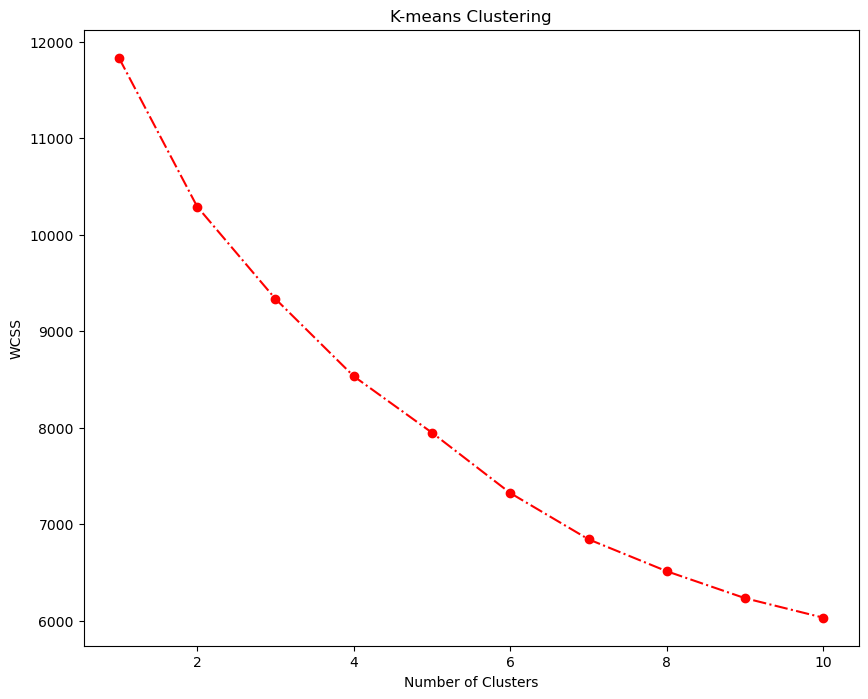

In [44]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [45]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [46]:
# We divide our data into the four clusters.
kmeans.fit(df_std)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [47]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans= df_std.copy()
df_segm_kmeans = pd.DataFrame(data = df_std,columns = df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [48]:
df_segm_kmeans.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,Segment K-means
0,0.233197,-0.850750,-0.938978,-0.243056,-0.469358,-1.306105,-1.399250,-0.523356,-0.365148,-0.891187,0.106210,-0.635742,3
1,1.307981,1.175433,-0.938978,-0.243056,-0.469358,1.170852,-0.277062,-0.523356,-0.365148,-0.891187,0.746721,-0.839024,3
2,-0.411674,1.175433,1.064988,-0.243056,-0.469358,-1.008870,-1.258976,-0.523356,-0.365148,0.444239,-0.214045,-0.651273,2
3,0.734763,1.175433,1.064988,-0.243056,2.130569,1.468086,1.125674,-0.523356,-0.365148,1.779665,0.586594,0.052692,2
4,-0.268369,-0.850750,-0.938978,-0.243056,2.130569,-0.216244,0.774990,-0.523356,-0.365148,0.444239,-0.214045,0.761487,1


In [49]:
dfcopy['kcluster']=df_segm_kmeans['Segment K-means']

In [50]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
Segment K-means,,,,,,,,,,,,
0,-0.035173,-0.150796,-0.100956,4.114277,0.145170,-0.129776,0.008586,0.007720,-0.082988,-0.017090,1.189256,0.096720
1,-0.278782,-0.191715,-0.231696,-0.243056,0.007445,-0.384574,0.897547,-0.068542,-0.096657,-0.438343,-0.057242,0.997872
2,0.899238,0.326804,0.687618,-0.243056,0.054004,0.036277,-0.183015,0.124683,0.259635,0.916841,0.561639,-0.194216
3,-0.582223,-0.110648,-0.416987,-0.243056,-0.080147,0.320677,-0.609266,-0.056942,-0.142124,-0.463371,-0.664224,-0.700258


In [51]:
dfcopy.groupby(['kcluster'])[num_var].mean()

,Age,Weight,Height,PremiumPrice,BMI
kcluster,,,,,
0,41.254545,77.072727,166.872727,31763.636364,28.029004
1,37.854671,89.747405,164.301038,23979.238754,33.323897
2,54.295455,74.340909,168.548701,27844.155844,26.319558
3,33.619760,68.263473,171.419162,20188.622754,23.346208


In [52]:
dfcopy.groupby(['kcluster'])[cat_var].agg(pd.Series.mode).T

kcluster,0,1,2,3
Diabetes,0,0,1,0
BloodPressureProblems,0,0,1,0
AnyTransplants,1,0,0,0
AnyChronicDiseases,0,0,0,0
KnownAllergies,0,0,0,0
HistoryOfCancerInFamily,0,0,0,0
NumberOfMajorSurgeries,0,0,1,0
Age_Bucket,"['26-35', '56 and above'] Categories (5, objec...",36-45,56 and above,26-35
BMI_Category,Overweight,Obesity,Overweight,Normal weight


In [53]:
dfcopy['kcluster'].value_counts()

3    334
2    308
1    289
0     55
Name: kcluster, dtype: int64

<Figure size 400x400 with 0 Axes>

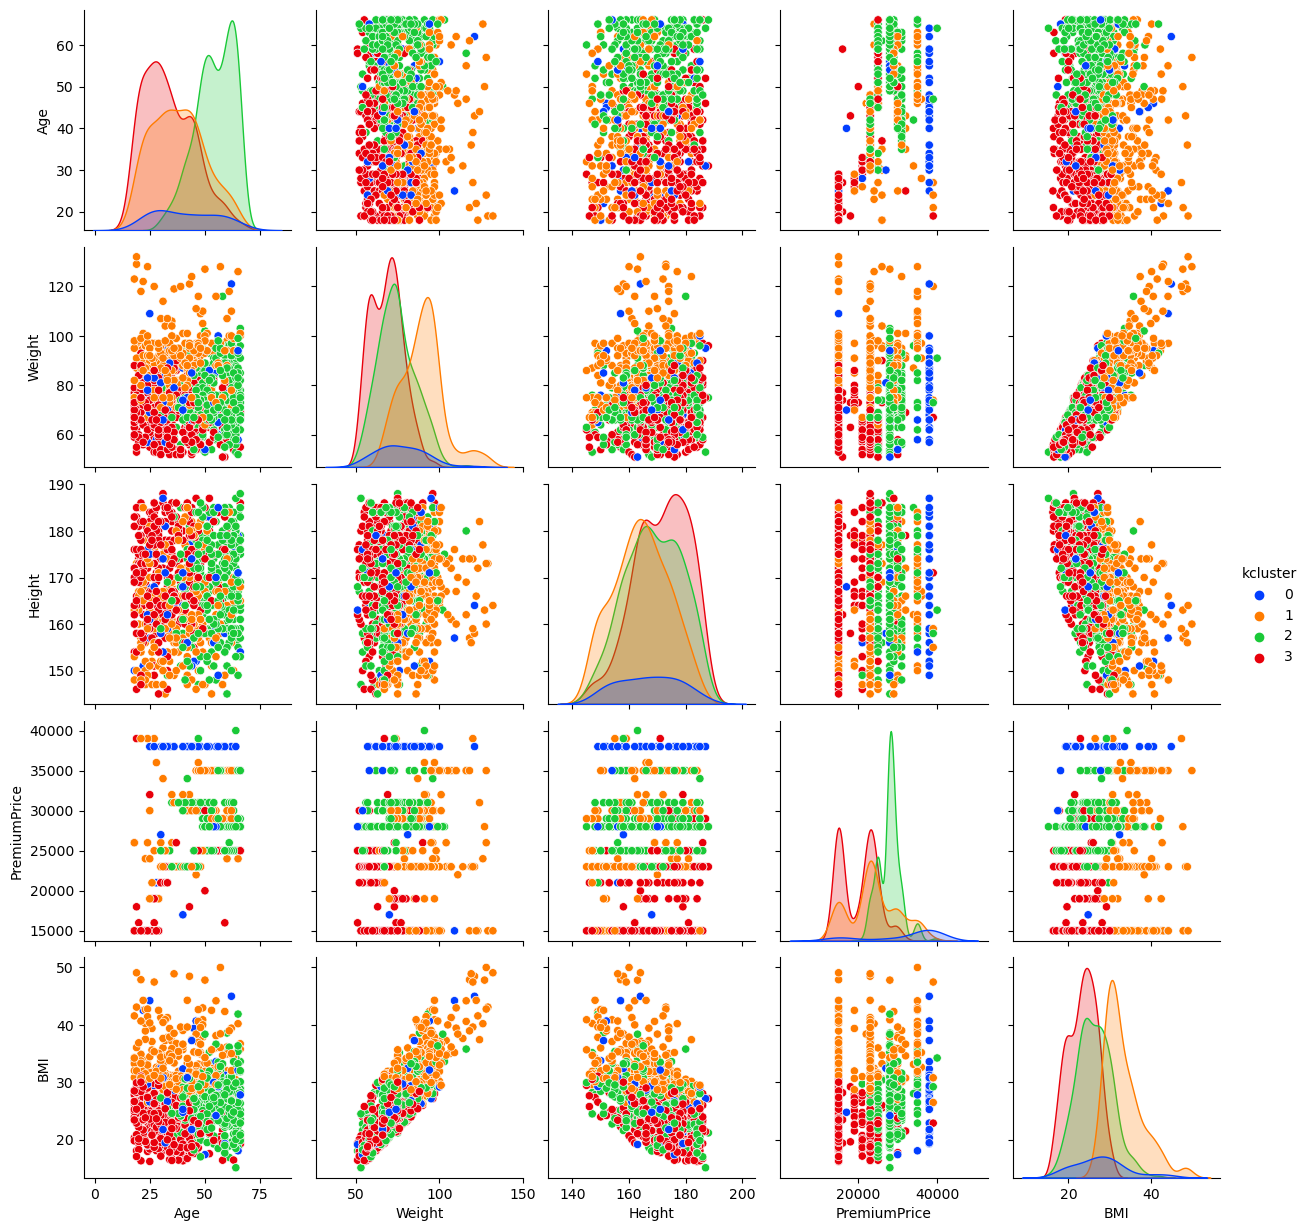

In [54]:
plt.figure(figsize=(4,4))
sns.pairplot(dfcopy[num_var+['kcluster']],hue='kcluster',palette='bright')
plt.show()

In [55]:
vals=[]
print("Age-cluster decile analysis")
for _,j in dfcopy.groupby('kcluster')['Age']:
    vals.append((np.percentile(j,np.arange(0,101,10))))
vals=np.array(vals)
pd.DataFrame(vals.T,columns=['c1','c2','c3','c4'],index=pd.Index(np.arange(0,11,1),name='deciles'))


Age-cluster decile analysis


,c1,c2,c3,c4
deciles,,,,
0,18.0,18.0,30.0,18.0
1,24.0,22.0,42.0,20.0
2,26.6,26.0,47.0,22.0
3,31.0,30.0,50.0,26.9
4,33.6,34.0,52.0,29.0
5,40.0,37.0,55.0,32.0
6,44.4,41.0,59.0,35.0
7,50.8,44.0,61.0,40.0
8,56.0,48.0,63.0,44.0


In [56]:
print("BMI-cluster decile analysis")
vals=[]
for _,j in dfcopy.groupby('kcluster')['BMI']:
    vals.append((np.percentile(j,np.arange(0,101,10))))
vals=np.array(vals)
pd.DataFrame(vals.T,columns=['c1','c2','c3','c4'],index=pd.Index(np.arange(0,11,1),name='deciles'))


BMI-cluster decile analysis


,c1,c2,c3,c4
deciles,,,,
0,17.432851,26.296567,15.156281,16.245274
1,19.407395,28.729622,20.980143,18.612245
2,21.799445,29.667164,22.848651,19.887286
3,24.902656,30.310869,23.808310,21.224490
4,26.651395,31.024058,24.834977,22.666157
5,27.681661,31.934969,26.144731,23.642766
6,29.242229,33.217993,27.303329,24.542563
7,30.502743,34.732448,28.664882,25.402816
8,32.165727,36.683959,29.938179,26.514773


In [57]:
print("premium-cluster decile analysis")
vals=[]
for _,j in dfcopy.groupby('kcluster')['PremiumPrice']:
    vals.append((np.percentile(j,np.arange(0,101,10))))
vals=np.array(vals)
pd.DataFrame(vals.T,columns=['c1','c2','c3','c4'],index=pd.Index(np.arange(0,11,1),name='deciles'))

premium-cluster decile analysis


,c1,c2,c3,c4
deciles,,,,
0,15000.0,15000.0,21000.0,15000.0
1,15000.0,15000.0,25000.0,15000.0
2,20200.0,15000.0,25000.0,15000.0
3,28000.0,23000.0,28000.0,15000.0
4,38000.0,23000.0,28000.0,18000.0
5,38000.0,23000.0,28000.0,21000.0
6,38000.0,23000.0,28000.0,23000.0
7,38000.0,27200.0,29000.0,23000.0
8,38000.0,30000.0,29000.0,23000.0


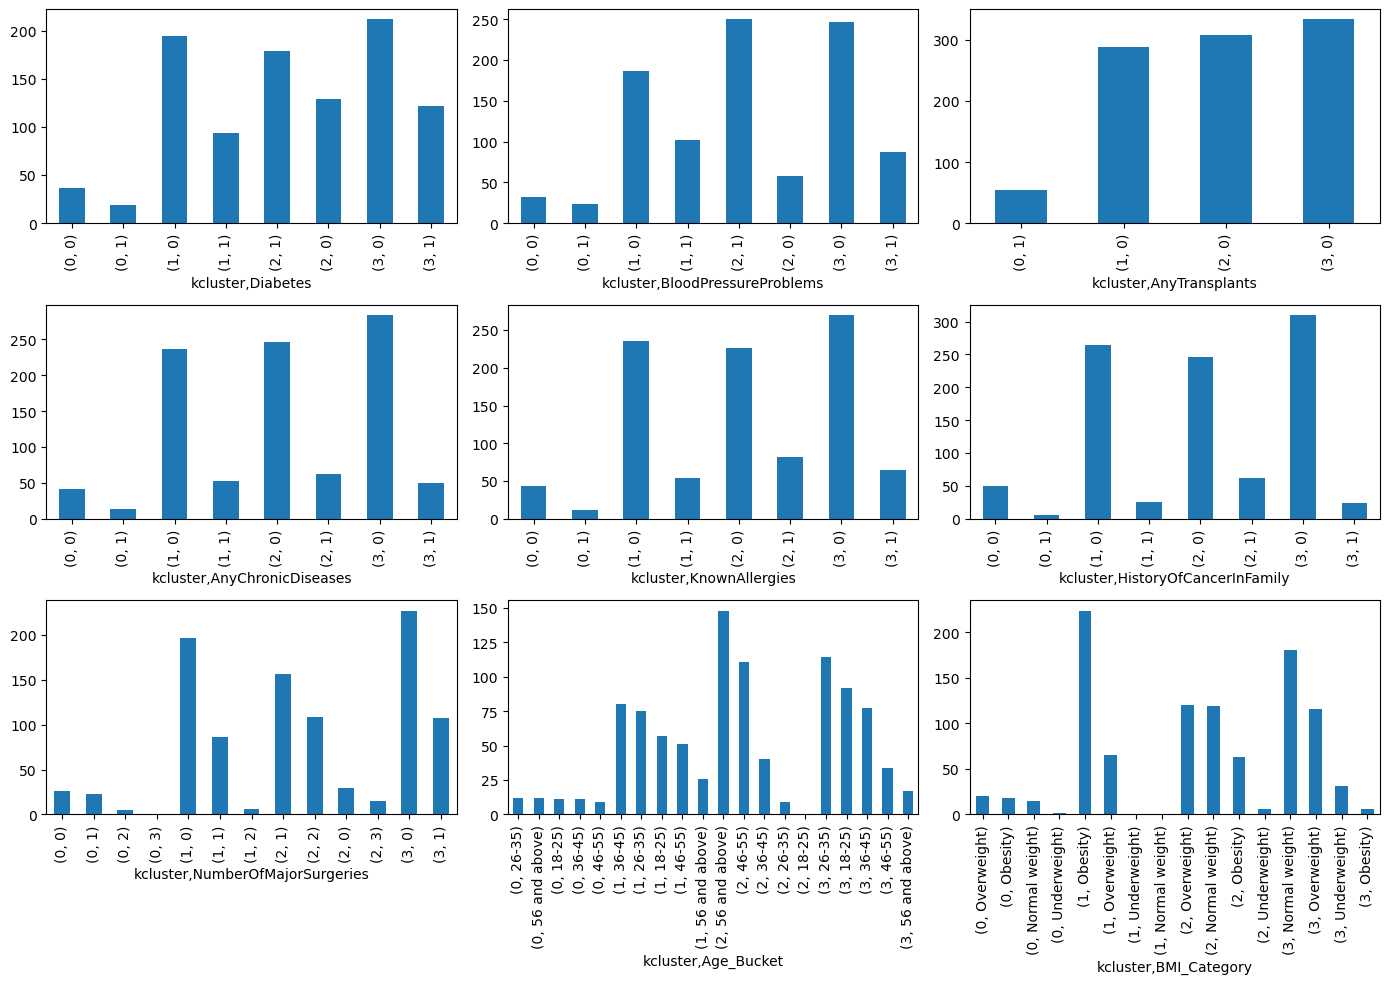

In [58]:
plt.figure(figsize=(14,10))
for i in range(0,len(cat_var)):
    plt.subplot(3,3,i+1)
    dfcopy.groupby('kcluster')[cat_var[i]].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

**********

Modeling

In [59]:
dfmodel=df.copy()


In [60]:
dfmodel.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI'],
      dtype='object')

In [61]:
var_ord=['Age','BMI','NumberOfMajorSurgeries','PremiumPrice', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies',
       'HistoryOfCancerInFamily'
       ]
dfmodel=dfmodel[var_ord]

In [62]:
dfmodel.head()

,Age,BMI,NumberOfMajorSurgeries,PremiumPrice,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily
0,45,23.725286,0,25000,0,0,0,0,0,0
1,60,22.530864,0,29000,1,0,0,0,0,0
2,36,23.634033,1,23000,1,1,0,0,0,0
3,52,27.770313,2,28000,1,1,0,1,0,0
4,38,31.934969,1,23000,0,0,0,1,0,0


Data Preprocessing

In [63]:
numerical_features = ['Age','BMI','NumberOfMajorSurgeries']
scaler = StandardScaler()
dfmodel[numerical_features] = scaler.fit_transform(dfmodel[numerical_features])

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dfmodel.drop('PremiumPrice', axis=1)
                                                    , dfmodel['PremiumPrice'], test_size=0.2, random_state=42)

In [66]:
# Simple regressors
linear_reg = LinearRegression()
ridge_reg = Ridge()
decision_tree_reg = DecisionTreeRegressor()
# Ensemble methods
random_forest_reg = RandomForestRegressor(random_state=42)
bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)
adaboost_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)
gradient_boost_reg = GradientBoostingRegressor(random_state=42)

In [67]:
# Train and evaluate each regressor
regressors = [linear_reg, ridge_reg, decision_tree_reg, random_forest_reg, bagging_reg, 
              adaboost_reg, gradient_boost_reg]

In [68]:
for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2=r2_score(y_test,y_pred)
    print("{} - MSE: {:.4f}, MAE: {:.4f},R2: {:.4f}".format(type(regressor).__name__, mse, mae,r2))

LinearRegression - MSE: 12458637.8193, MAE: 2629.6486,R2: 0.7078
Ridge - MSE: 12512630.2161, MAE: 2636.2047,R2: 0.7066
DecisionTreeRegressor - MSE: 9323232.3232, MAE: 1353.5354,R2: 0.7814


RandomForestRegressor - MSE: 5803273.7374, MAE: 1430.6061,R2: 0.8639
BaggingRegressor - MSE: 6663737.3737, MAE: 1451.5152,R2: 0.8437
AdaBoostRegressor - MSE: 6888888.8889, MAE: 1050.5051,R2: 0.8385
GradientBoostingRegressor - MSE: 6162511.6660, MAE: 1670.3105,R2: 0.8555


In [69]:
features=['Age', 'BMI', 'NumberOfMajorSurgeries', 'Diabetes',
       'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
       'KnownAllergies', 'HistoryOfCancerInFamily']
pd.DataFrame({'Feature': features, 'Importance': (random_forest_reg.feature_importances_)})

,Feature,Importance
0,Age,0.631411
1,BMI,0.152452
2,NumberOfMajorSurgeries,0.032317
3,Diabetes,0.009858
4,BloodPressureProblems,0.010335
5,AnyTransplants,0.095247
6,AnyChronicDiseases,0.039561
7,KnownAllergies,0.006343
8,HistoryOfCancerInFamily,0.022476


Here are the observations based on the given data points:

1. **Data Structure**:
   - The dataset contains 986 rows and 11 columns, with 'premium' as the target variable.

2. **Variable Types**:
   - Numeric variables: age, height, weight.
   - Ordinal variable: surgery number.
   - Binary categories: health conditions.

3. **BMI Index**:
   - BMI, a known risk factor in insurance, can be derived from weight and height.

4. **Missing Values**:
   - The dataset has no null values.

5. **Outliers**:
   - A small number of outliers are present, indicating no mandatory treatment is needed.
   - The outliers seem reasonable upon inspection.

6. **Data Distribution**:
   - The numeric data does not follow a normal distribution, confirmed through visual inspection, Q-Q plots, and hypothesis testing.

7. **Premium Analysis**:
   - Visual and group-by analysis shows higher age and BMI are associated with higher mean premiums.
   - Presence of health conditions also leads to higher premiums.

8. **Demographics**:
   - 60% of the insured individuals are aged 22-50 and have a decent BMI level according to decile analysis, with premiums ranging from 15k-28k.
   - 30% fall into the obese category, aged 56-66, with premiums ranging from 29k-40k.
   - 10% are in the 18-22 age range and are underweight.

9. **Risk Factors**:
   - Older age (56+) and higher BMI indicate the highest premiums, implying the highest risk.
   - Underweight individuals are fewer across all age categories, indicating either high risk or generally low numbers.

10. **Health Conditions**:
    - Health conditions increase premiums due to higher risk.
    - Variables exhibit expected average premiums; individuals with health issues are charged more.

11. **High-Risk Categories**:
    - Few customers fall into sub-categories such as transplants, chronic diseases, cancer in family, and high number of surgeries (2-3), explaining high risk cases are not preferred, and those accepted are charged more.

12. **Premium Correlation**:
    - The highest premiums are observed for customers with transplants.
    - Premium price is highly correlated with age, followed by BMI.

13. **Linear Relationships**:
    - Hard to see any linear relationship of premium price with variables except age and BMI.

14. **Clustering Analysis**:
    - Highest risk groups:
      - Overweight, middle-aged, with transplants.
      - 50+ years old, overweight, with diabetes, BP, and one major surgery.
      - 36-45 years old, obese, with no health conditions.
      - 26-35 years old, normal weight, with no health conditions.

15. **Model Insights**:
    - Random Forest model suggests age and BMI are the top two indicators of premium.

Based on the observations, here are some suggestions for better business management, particularly in the areas of sales, pricing, and risk planning:

### Sales Strategy
1. **Targeted Marketing**:
   - **High-Risk Groups**: Focus marketing efforts on high-risk groups such as older adults (56+), those with higher BMI, and individuals with specific health conditions like diabetes or history of surgeries. Tailor messages to emphasize the importance of comprehensive coverage.
   - **Young Adults and Low-Risk Groups**: Market to younger, healthier individuals by highlighting lower premiums and long-term benefits of starting insurance early.

2. **Customized Plans**:
   - Offer customized insurance plans based on the specific needs of different demographic segments. For instance, plans with more preventive care benefits for older adults or wellness programs for young adults.

3. **Health Incentive Programs**:
   - Introduce wellness and health incentive programs that reward policyholders for maintaining healthy lifestyles. This can help in reducing overall risk and encouraging more people to join.

### Pricing Strategy
1. **Dynamic Pricing**:
   - Implement dynamic pricing models that adjust premiums based on real-time health data and lifestyle changes. Use wearable technology and regular health check-ups to monitor policyholders' health and adjust premiums accordingly.

2. **Risk-Based Pricing**:
   - Continue using age and BMI as primary factors for pricing premiums. Additionally, include other risk indicators like health conditions and surgery history to create a more accurate risk-based pricing model.

3. **Discounts and Rewards**:
   - Offer discounts for policyholders who actively participate in health and wellness programs. Provide rewards for those who demonstrate consistent healthy behaviors over time.

### Risk Planning
1. **Predictive Analytics**:
   - Utilize predictive analytics to identify potential high-risk individuals and offer them targeted interventions. This can help in mitigating risks before they result in costly claims.

2. **Outlier Management**:
   - Regularly review and analyze outliers to understand underlying causes. Implement strategies to manage these high-risk cases, such as offering specialized coverage or personalized health management plans.

3. **Preventive Health Measures**:
   - Invest in preventive health measures for policyholders, such as regular health screenings, fitness programs, and chronic disease management. This can help reduce the overall risk and cost of claims.

### Customer Retention and Satisfaction
1. **Customer Education**:
   - Educate customers on the importance of maintaining a healthy lifestyle and its impact on insurance premiums. Provide resources and support to help them achieve their health goals.

2. **Enhanced Customer Service**:
   - Offer superior customer service with personalized support and timely assistance. Ensure that customers feel valued and supported throughout their insurance journey.

3. **Feedback Mechanism**:
   - Implement a robust feedback mechanism to gather insights from policyholders about their needs and preferences. Use this feedback to continuously improve products and services.

### Innovation and Technology
1. **Technology Integration**:
   - Integrate advanced technologies like AI and machine learning to better assess risk and personalize insurance offerings. Use telematics and IoT devices for real-time monitoring and data collection.

2. **Data-Driven Decisions**:
   - Make data-driven decisions for product development, marketing strategies, and risk management. Leverage data analytics to gain deeper insights into customer behavior and risk patterns.

By implementing these strategies, the business can enhance its sales, pricing, and risk planning processes, leading to better management and profitability.

In [70]:
# with open('scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

# with open('random_forest_reg.pkl', 'wb') as file:
#     pickle.dump(random_forest_reg, file)